In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.tsv',sep='\t')
test=pd.read_csv('test.tsv',sep='\t')

In [20]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
train.shape

(1482535, 8)

In [5]:
test.shape

(693359, 7)

In [6]:
c=0
for i in train['train_id']:
    if i==i+1:
        c=c+1
    if(c!=0):
        print(i,c)
        

In [7]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [9]:
train.isna().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [10]:
print("Number of missing values in category name: ",train['category_name'].isna().sum())
print("Number of missing values in brand name: ",train['brand_name'].isna().sum())
print("Number of missing values in item description: ",train['item_description'].isna().sum())


Number of missing values in category name:  6327
Number of missing values in brand name:  632682
Number of missing values in item description:  4


In [11]:
print("Percentage of Missing values")
print("category_name:",train['category_name'].isna().sum()*100/len(train['category_name']))
print("brand_name:",train['brand_name'].isna().sum()*100/len(train['brand_name']))
print("item_description:",train['item_description'].isna().sum()*100/len(train['item_description']))

Percentage of Missing values
category_name: 0.42676901388500105
brand_name: 42.67568725190299
item_description: 0.00026980813269163965


### PRICE

In [12]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [24]:
# print(np.percentile(train['price'],90))
for i in range(0,101):
    print(np.percentile(train['price'],i))

0.0
3.0
4.0
5.0
5.0
6.0
6.0
7.0
7.0
7.0
7.0
8.0
8.0
8.0
8.0
9.0
9.0
9.0
9.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
11.0
11.0
11.0
12.0
12.0
12.0
12.0
12.0
13.0
13.0
14.0
14.0
14.0
14.0
14.0
14.0
15.0
15.0
15.0
16.0
16.0
16.0
16.0
16.0
17.0
18.0
18.0
18.0
19.0
19.0
19.0
20.0
20.0
20.0
20.0
21.0
22.0
22.0
23.0
24.0
24.0
24.0
25.0
25.0
26.0
26.0
26.0
28.0
29.0
29.0
30.0
31.0
31.0
33.0
34.0
35.0
36.0
38.0
39.0
40.0
42.0
44.0
46.0
49.0
51.0
55.0
58.0
62.0
67.0
75.0
85.0
99.0
122.0
170.0
2009.0


In [ ]:
np.where(train['price']>170)

In [6]:
print(np.percentile(train['price'],91))
print(np.percentile(train['price'],92))
print(np.percentile(train['price'],93))
print(np.percentile(train['price'],94))
print(np.percentile(train['price'],95))
print(np.percentile(train['price'],96))
print(np.percentile(train['price'],97))
print(np.percentile(train['price'],98))
print(np.percentile(train['price'],99))

55.0
58.0
62.0
67.0
75.0
85.0
99.0
122.0
170.0


In [21]:
print(np.percentile(train['price'],98.1))
print(np.percentile(train['price'],98.2))
print(np.percentile(train['price'],98.3))
print(np.percentile(train['price'],98.4))
print(np.percentile(train['price'],98.5))

126.0
129.0
131.0
136.0
141.0


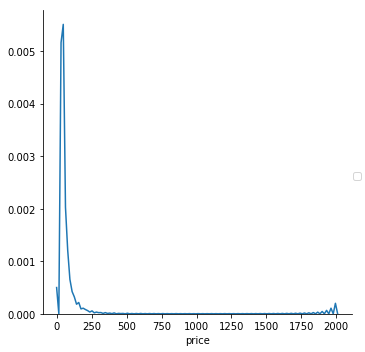

In [13]:
sns.FacetGrid(train, size=5) \
   .map(sns.distplot, "price",hist=False) \
   .add_legend()
plt.show()

Text(0.5,1,'Price Distribution - Training Set')

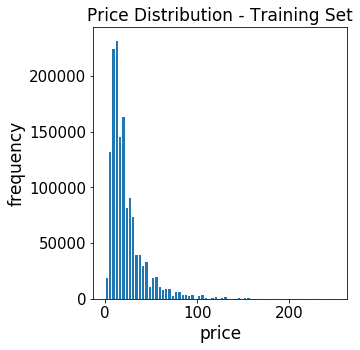

In [14]:
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=70,figsize=(10,5), edgecolor='white',range=[0,250])
plt.xlabel('price', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)

### BRAND NAME

In [15]:
len(train['brand_name'].unique())

4810

In [16]:
train.brand_name.describe()

count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object

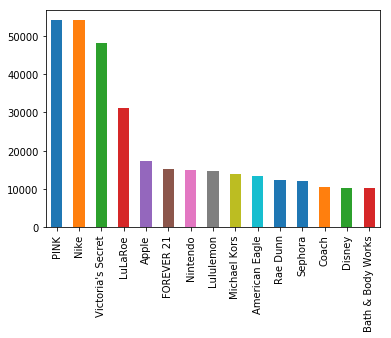

In [17]:
a=train['brand_name'].value_counts()[:15]
a.plot(kind="bar")

In [18]:
train.brand_name=train.brand_name.fillna('missing')

In [19]:
train['brand_name'].value_counts()[:5]

missing              632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64

In [ ]:
brand_names=train.brand_name.unique()
brandexpense=list()
for name in brand_names:
    if len(train[train['brand_name']==name] )>=50:
                       brandexpense.append([name,train.price[train['brand_name']==name].median()])
    
brandexpense.sort(key=lambda x: x[1],reverse=True)
brandexpense[:10]

In [21]:
train['shipping'].value_counts()


0    819435
1    663100
Name: shipping, dtype: int64

In [22]:

print("If shipping =1, then , delivery charges are borne by the buyer")
print("If shipping =0 , then ,delivery charges are borne by the seller")
print("Percentage of shipping =1 : ", 663100*100/train.shape[0])
print("Percentage of shipping =0 : ",819435*100/train.shape[0])

If shipping =1, then , delivery charges are borne by the buyer
If shipping =0 , then ,delivery charges are borne by the seller
Percentage of shipping =1 :  44.727443196956564
Percentage of shipping =0 :  55.272556803043436


In [23]:
print('Mean price of items for which shipping fees is borne by seller is ',train.price[train['shipping']==0].mean())
print('Mean price of items for which shipping fees is borne by buyer is ',train.price[train['shipping']==1].mean())

Mean price of items for which shipping fees is borne by seller is  30.111777627267568
Mean price of items for which shipping fees is borne by buyer is  22.56772583320766


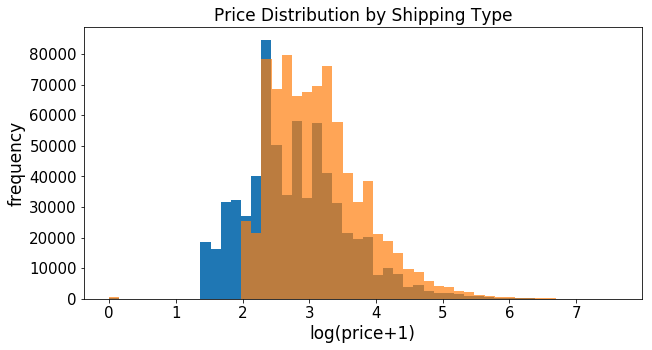

In [24]:
sel= train.loc[train.shipping==1, 'price']
buy= train.loc[train.shipping==0, 'price']
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(np.log(sel+1), alpha=1.0, bins=50,
       label='Price when Seller bears Shipping Fee')
ax.hist(np.log(buy+1), alpha=0.7, bins=50,
       label='Price when Buyer bears Shipping fee')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)
plt.tick_params(labelsize=15)
plt.show()


In [25]:
train.item_condition_id.describe()

count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64

In [26]:
item_id=train['item_condition_id'].value_counts()

In [27]:
train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

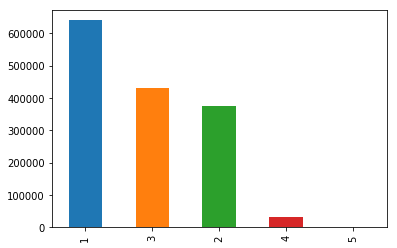

In [28]:
item_id.plot(kind='bar')

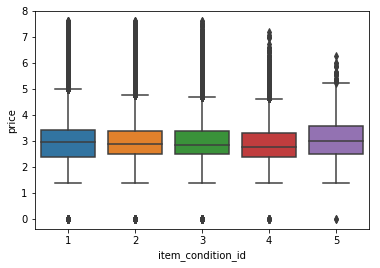

In [29]:
sns.boxplot(x='item_condition_id',y=np.log(train.price+1), data=train)
plt.show()

In [30]:
len(train.category_name.unique())

1288

In [31]:
train.category_name.isna().sum()

6327

In [32]:
print("Percentage of Missing values: ",6327*100/train.shape[0])

Percentage of Missing values:  0.42676901388500105


In [33]:
train.category_name.describe()

count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object

In [34]:
train.category_name.value_counts()[:20]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

In [24]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan



In [25]:
train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

In [28]:
maincat = [x for x in train['category_main'].unique() if type(x)==str]
catsum=0
for x in maincat:
    catsum+=100*len(train[train['category_main']==x])/len(train)
    print('{:25}{:3f}% of training data'.format(x, 100*len(train[train['category_main']==x])/len(train)))
print('nan\t\t {:3f}% of training data'.format(100-catsum))

Men                      6.297524% of training data
Electronics              8.069354% of training data
Women                    44.814119% of training data
Home                     4.578037% of training data
Sports & Outdoors        1.641175% of training data
Vintage & Collectibles   3.138543% of training data
Beauty                   14.018421% of training data
Other                    3.059017% of training data
Kids                     11.580772% of training data
Handmade                 2.080221% of training data
nan		 0.722816% of training data


In [38]:
category_names=train.category_main.unique()
expensive_cat=list()
category_names

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan,
       'Handmade'], dtype=object)

In [39]:
train.category_main.isna().sum()
train.category_sub1.isna().sum()
train.category_sub2.isna().sum()


10716

In [40]:
print("Percentage of missing values: ",10716*100/len(train.category_name))

Percentage of missing values:  0.7228159874809026


In [41]:
for name in category_names:
    if len(train[train['category_main']==name] )>=10:
                       expensive_cat.append([name,train.price[train['category_main']==name].median()])


In [42]:
expensive_cat.sort(key=lambda x: x[1],reverse=True)

In [43]:
expensive_cat

[['Men', 21.0],
 ['Women', 19.0],
 ['Home', 18.0],
 ['Sports & Outdoors', 16.0],
 ['Vintage & Collectibles', 16.0],
 ['Electronics', 15.0],
 ['Beauty', 15.0],
 ['Other', 14.0],
 ['Kids', 14.0],
 ['Handmade', 12.0]]

No handles with labels found to put in legend.


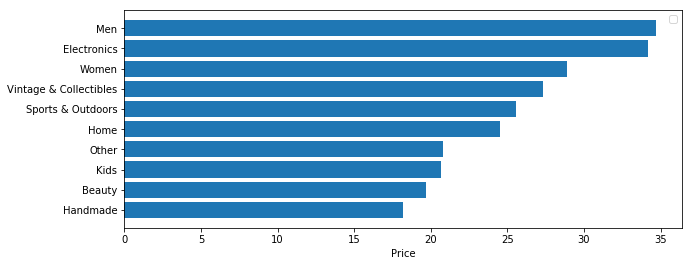

In [44]:
df1 = train.groupby(['category_main'])['price'].agg(['size','sum'])
df1['mean_price']=df1['sum']/df1['size']
df1.sort_values(by=['mean_price'], ascending=False, inplace=True)
df1 = df1[:10]
df1.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df1)), df1['mean_price'])
plt.yticks(range(0,len(df1)), df1.index, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [45]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'category_main',
       'category_sub1', 'category_sub2'],
      dtype='object')

In [46]:
train.category_sub1.describe()

count              1471819
unique                 113
top       Athletic Apparel
freq                134383
Name: category_sub1, dtype: object

No handles with labels found to put in legend.


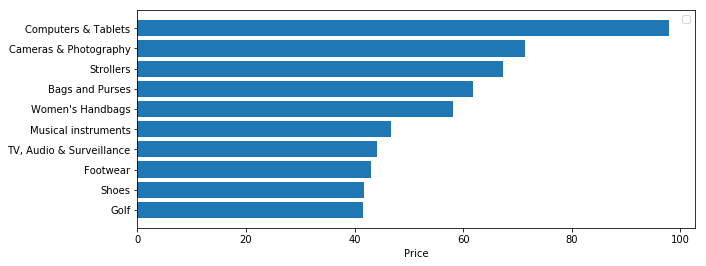

In [47]:
df = train.groupby(['category_sub1'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:10]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df)), df['mean_price'])
plt.yticks(range(0,len(df)), df.index, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [48]:
train.category_sub2.describe()

count                     1471819
unique                        864
top       Pants, Tights, Leggings
freq                        60177
Name: category_sub2, dtype: object

No handles with labels found to put in legend.


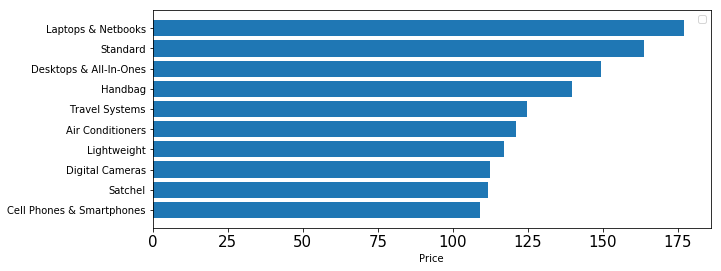

In [49]:
df2 = train.groupby(['category_sub2'])['price'].agg(['size','sum'])
df2['mean_price']=df2['sum']/df2['size']
df2.sort_values(by=['mean_price'], ascending=False, inplace=True)
df2 = df2[:10]
df2.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df2)), df2['mean_price'])
plt.yticks(range(0,len(df2)), df2.index, fontsize=10)
plt.xticks(fontsize=15)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [50]:
train.name.describe()

count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object

In [51]:
print("Number of duplicate values: ",len(train.name)-len(train.name.unique()))

Number of duplicate values:  257262


In [52]:
print("Percentage of duplicate values: ",257262*100/len(train.name))

Percentage of duplicate values:  17.35284495812915


In [19]:
train.name.value_counts()[:20]

Bundle                  2232
Reserved                 453
Converse                 445
BUNDLE                   418
Dress                    410
Coach purse              404
Lularoe TC leggings      396
Romper                   353
Nike                     340
Vans                     334
American Eagle Jeans     325
Miss Me Jeans            284
Lularoe OS leggings      281
ON HOLD                  274
Coach Purse              258
Lularoe Irma             254
Shorts                   247
Michael Kors Purse       243
Bundle!                  242
Coach wallet             242
Name: name, dtype: int64

In [54]:
train.name=train.name.str.lower()

In [55]:
train.name.value_counts()

bundle                                      2778
lularoe tc leggings                         1126
lularoe os leggings                          897
coach purse                                  698
american eagle jeans                         671
miss me jeans                                670
reserved                                     654
on hold                                      562
michael kors purse                           557
michael kors wallet                          489
converse                                     473
lularoe irma                                 453
coach wallet                                 436
dress                                        428
nike shorts                                  407
lularoe leggings                             394
vans                                         383
hollister jeans                              381
coach wristlet                               380
romper                                       379
reserved bundle     

In [56]:
m=[]
k=[]
for i in train['name']:
    m=i.split()
    k.append(len(m))
    m=[]


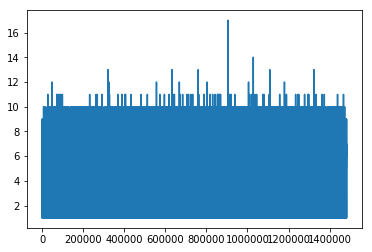

In [57]:
plt.plot(k)

In [58]:
print(max(k))
print(min(k))
print()
print(k.index(1))

17
1
98


In [8]:
print(train.iloc[[98]])

    train_id   name  item_condition_id                  category_name  \
98        98  Gucci                  3  Men/Men's Accessories/Watches   

   brand_name  price  shipping  \
98        NaN   49.0         0   

                                     item_description  
98  Rose gold bezel and crown Engraved logo Red an...  


In [74]:
train['item_description'].describe()

count                1482531
unique               1281426
top       No description yet
freq                   82489
Name: item_description, dtype: object

In [23]:
train['item_description'] = train['item_description'].str.lower()
train[train.item_description.isna()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description


In [11]:
train["item_description"] = train["item_description"].fillna("None")

In [12]:
m=[]
k=[]
for i in train['item_description']:
    m=i.split()
    k.append(len(m))
    m=[]

In [22]:
print(max(k))
print(min(k))


245
1


In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(train.item_description.astype(str)))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

MemoryError: 

In [1]:
train_ds = pd.Series(train['item_description'].tolist()).astype(str)
test_ds = pd.Series(test['item_description'].tolist()).astype(str)

bins=100
plt.figure(figsize=(20, 15))
plt.hist(train_ds.apply(len), bins, range=[0,600], label='train')
#plt.hist(test_ds.apply(len), bins, alpha=0.6,range=[0,600], label='test')
plt.title('Histogram of character count', fontsize=15)
plt.xlabel('Characters Number', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


NameError: name 'pd' is not defined

In [16]:
train['has_description'] = 1
train.loc[train['item_description']=='No description yet', 'has_description'] = 0


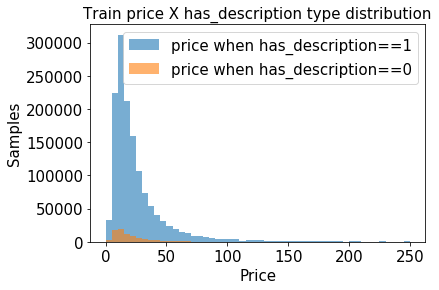

In [17]:

bins=50
plt.hist(train[train['has_description']==1]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(train[train['has_description']==0]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


No handles with labels found to put in legend.


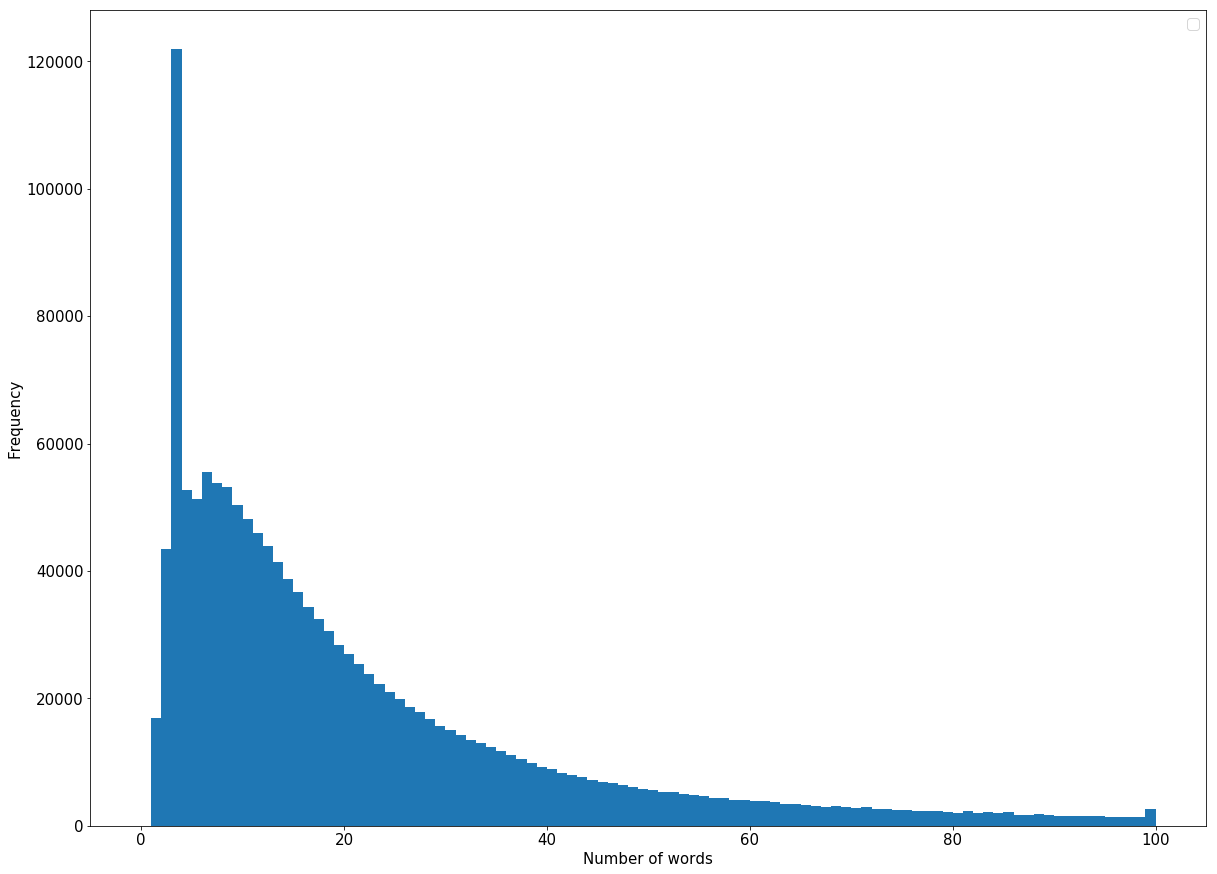

In [18]:
bins=100
plt.figure(figsize=(20, 15))
plt.hist(train_ds.apply(lambda x: len(x.split())), bins, range=[0,100])

plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [3]:
y_true=train['price']

In [7]:
y_true.head()

0    10.0
1    52.0
2    10.0
3    35.0
4    44.0
Name: price, dtype: float64

In [4]:
X=train.drop('price',axis=1)


In [16]:
X.head()

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description,category_main,category_sub1
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,1,no description yet,Men,Tops
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,this keyboard is in great condition and works ...,Electronics,Computers & Tablets
2,2,ava viv blouse,1,Women/Tops & Blouses/Blouse,Target,1,adorable top with a hint of lace and a key hol...,Women,Tops & Blouses
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,NaN,1,new with tags leather horses retail for rm eac...,Home,Home Décor
4,4,k gold plated rose,1,Women/Jewelry/Necklaces,NaN,0,complete with certificate of authenticity,Women,Jewelry


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

import gc

In [10]:
NUM_BRANDS = 2500
NAME_MIN_DF = 10
MAX_FEAT_DESCP = 500




X_train["category_name"] = X_train["category_name"].fillna("Other").astype("category")
X_train["brand_name"] = X_train["brand_name"].fillna("unknown")

pop_brands = X_train["brand_name"].value_counts().index[:NUM_BRANDS]
X_train.loc[~X_train["brand_name"].isin(pop_brands), "brand_name"] = "Other"

X_train["item_description"] = X_train["item_description"].fillna("None")
X_train["item_condition_id"] = X_train["item_condition_id"].astype("category")
X_train["brand_name"] = X_train["brand_name"].astype("category")

#print(X_train.memory_usage(deep = True))

print("Encodings")
count = CountVectorizer(min_df=NAME_MIN_DF)
X_name = count.fit_transform(X_train["name"])

print("Category Encoders")
unique_categories = pd.Series("/".join(X_train["category_name"].unique().astype("str")).split("/")).unique()
count_category = CountVectorizer()
X_category = count_category.fit_transform(X_train["category_name"])



C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Naren\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

Encodings
Category Encoders


In [17]:
print("Descp encoders")
count_descp = TfidfVectorizer(max_features = MAX_FEAT_DESCP, 
                              ngram_range = (1,3),
                              stop_words = "english")



Descp encoders


In [18]:
X_descp = count_descp.fit_transform(X_train["item_description"])


MemoryError: 

In [13]:
import scipy

In [14]:
print("Dummy Encoders")
X_dummies = scipy.sparse.csr_matrix(pd.get_dummies(X_train[[
    "item_condition_id", "shipping"]], sparse = True).values)

Dummy Encoders


In [15]:
print("Brand encoders")
vect_brand = LabelBinarizer(sparse_output=True)
X_brand = vect_brand.fit_transform(X_train["brand_name"])


Brand encoders


In [4]:
n=train.shape[0]

In [7]:
df=train[n:]